In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [4]:
# Import Citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities. 
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If teh city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count. 
len(cities)

610

In [6]:
# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list. 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API Request for each of the cities. 
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Covert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list. 
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
          
# If an error is experienced, skip the city. 
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kloulklubed
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | huntington
Processing Record 6 of Set 1 | te anau
Processing Record 7 of Set 1 | siguiri
Processing Record 8 of Set 1 | kenai
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | sao joao da barra
Processing Record 13 of Set 1 | bairiki
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | necochea
Processing Record 19 of Set 1 | nieuw amsterdam
Processing Record 20 of Set 1 | dingle
Processing Record 21 of Set 1 | sechura
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1 

Processing Record 41 of Set 4 | port arthur
Processing Record 42 of Set 4 | orotukan
Processing Record 43 of Set 4 | tingrela
City not found. Skipping...
Processing Record 44 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 45 of Set 4 | tessalit
Processing Record 46 of Set 4 | naze
Processing Record 47 of Set 4 | koygorodok
Processing Record 48 of Set 4 | salinopolis
Processing Record 49 of Set 4 | rurrenabaque
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | mahebourg
Processing Record 2 of Set 5 | arrecife
Processing Record 3 of Set 5 | badajoz
Processing Record 4 of Set 5 | likasi
Processing Record 5 of Set 5 | brae
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | veraval
Processing Record 9 of Set 5 | honiara
Processing Record 10 of Set 5 | narsaq
Processing Record 11 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 5 | ngorongoro
Processing Record 13 of

Processing Record 33 of Set 8 | san jose de guanipa
Processing Record 34 of Set 8 | independencia
Processing Record 35 of Set 8 | pingdingshan
Processing Record 36 of Set 8 | khani
Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | waipawa
Processing Record 39 of Set 8 | san ramon de la nueva oran
Processing Record 40 of Set 8 | pineville
Processing Record 41 of Set 8 | ambilobe
Processing Record 42 of Set 8 | kargil
Processing Record 43 of Set 8 | shimoda
Processing Record 44 of Set 8 | sal rei
Processing Record 45 of Set 8 | christchurch
Processing Record 46 of Set 8 | cranbrook
Processing Record 47 of Set 8 | halalo
City not found. Skipping...
Processing Record 48 of Set 8 | pochutla
Processing Record 49 of Set 8 | toliary
City not found. Skipping...
Processing Record 50 of Set 8 | pecos
Processing Record 1 of Set 9 | hope
Processing Record 2 of Set 9 | avera
Processing Record 3 of Set 9 | sampit
Processing Record 4 of Set 9 | gazojak
Processing Record 5 of Set

Processing Record 19 of Set 12 | tome
Processing Record 20 of Set 12 | warqla
City not found. Skipping...
Processing Record 21 of Set 12 | port hardy
Processing Record 22 of Set 12 | saint anthony
Processing Record 23 of Set 12 | ellisras
Processing Record 24 of Set 12 | san matias
Processing Record 25 of Set 12 | la ronge
Processing Record 26 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 27 of Set 12 | olafsvik
City not found. Skipping...
Processing Record 28 of Set 12 | amapa
Processing Record 29 of Set 12 | zhengjiatun
Processing Record 30 of Set 12 | rolla
Processing Record 31 of Set 12 | zhanaozen
Processing Record 32 of Set 12 | portland
Processing Record 33 of Set 12 | great yarmouth
Processing Record 34 of Set 12 | panzhihua
Processing Record 35 of Set 12 | xai-xai
Processing Record 36 of Set 12 | shahrud
Processing Record 37 of Set 12 | fort nelson
Processing Record 38 of Set 12 | alamosa
Processing Record 39 of Set 12 | samusu
City not found. 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kloulklubed,7.04,134.26,86.00,70,75,3.36,PW,2020-11-05 02:44:01
1,Rikitea,-23.12,-134.97,73.69,68,14,10.02,PF,2020-11-05 02:44:02
2,Hobart,-42.88,147.33,62.01,38,75,4.70,AU,2020-11-05 02:39:34
3,Alice Springs,-23.70,133.88,80.60,30,0,16.11,AU,2020-11-05 02:44:02
4,Huntington,38.42,-82.45,53.60,50,1,4.09,US,2020-11-05 02:44:02
5,Te Anau,-45.42,167.72,59.14,89,100,3.22,NZ,2020-11-05 02:44:02
6,Siguiri,11.67,-9.50,75.06,48,0,2.33,GN,2020-11-05 02:44:02
7,Kenai,60.55,-151.26,25.00,67,1,3.36,US,2020-11-05 02:39:36
8,Saskylakh,71.92,114.08,-8.82,90,81,4.70,RU,2020-11-05 02:44:02
9,East London,-33.02,27.91,67.60,86,99,7.92,ZA,2020-11-05 02:44:03


In [8]:
# Arrange the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kloulklubed,PW,2020-11-05 02:44:01,7.04,134.26,86.00,70,75,3.36
1,Rikitea,PF,2020-11-05 02:44:02,-23.12,-134.97,73.69,68,14,10.02
2,Hobart,AU,2020-11-05 02:39:34,-42.88,147.33,62.01,38,75,4.70
3,Alice Springs,AU,2020-11-05 02:44:02,-23.70,133.88,80.60,30,0,16.11
4,Huntington,US,2020-11-05 02:44:02,38.42,-82.45,53.60,50,1,4.09
5,Te Anau,NZ,2020-11-05 02:44:02,-45.42,167.72,59.14,89,100,3.22
6,Siguiri,GN,2020-11-05 02:44:02,11.67,-9.50,75.06,48,0,2.33
7,Kenai,US,2020-11-05 02:39:36,60.55,-151.26,25.00,67,1,3.36
8,Saskylakh,RU,2020-11-05 02:44:02,71.92,114.08,-8.82,90,81,4.70
9,East London,ZA,2020-11-05 02:44:03,-33.02,27.91,67.60,86,99,7.92


In [9]:
# Create teh output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time

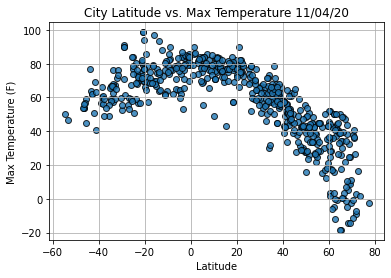

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig1.png")

# Show Plot.
plt.show()

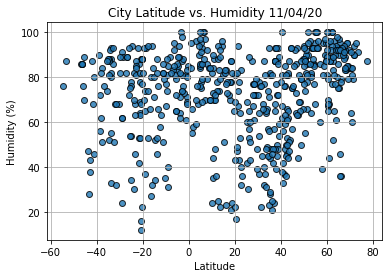

In [18]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig2.png")

# Show Plot.
plt.show()

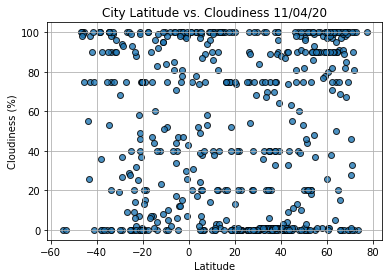

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig3.png")

# Show Plot.
plt.show()